<a href="https://colab.research.google.com/github/PaulaDiz/QUANTUM_COMPUTING/blob/main/HW_03_Shor%20_Error_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit

Bit flip correction (solo nos ccorrige 1 error, si hay dos errores a la vez no funciona.)

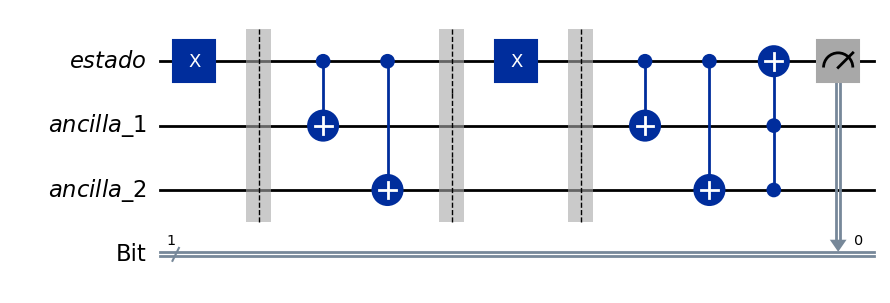

In [19]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

#CREACIÓN DEL CIRCUITO

#Creamos el circuito con nuestros qubits y bits
estado = QuantumRegister(1, "estado")
ancilla1 = QuantumRegister(1, "ancilla_1")
ancilla2 = QuantumRegister(1, "ancilla_2")
bit = ClassicalRegister(1, "Bit")

qc = QuantumCircuit(estado,ancilla1,ancilla2,bit)

#qc = QuantumCircuit(3, 3) # con (1,1) tambien funciona primero qubits segundo bits clasicos

#-------------------------------------------------------------------------------------------------

#1.APLICACIÓN DE PUERTAS

qc.x(0)# comprobación de si funciona también para uno

qc.barrier()

qc.cx(0,1)
qc.cx(0,2)

qc.barrier()
qc.x(0)
qc.barrier()

qc.cx(0,1)
qc.cx(0,2)
qc.ccx(1,2,0)

#--------------------------------------------------------------------------------------------------
#MEDICIÓN DEL QUBIT

#Medimos el qubit para ver si se ha aplicado bien la corrección.
qc.measure(0,0)

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')

In [20]:
 # TRANSPILACIÓN Y SIMULACIÓN DEL CIRCUITO.

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)

#SIMULACIÓN PARA EL CIRCUITO QC

isa_qc = pm.run(qc)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=100) #shots: cantidad de veces q lanzamos el circuito

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.Bit.get_counts()

SamplerPubResult(data=DataBin(Bit=BitArray(<shape=(), num_shots=100, num_bits=1>)), metadata={'shots': 100, 'circuit_metadata': {}})


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


{'1': 100}

Phase flip correction (solo nos ccorrige 1 error, si hay dos errores a la vez no funciona.)

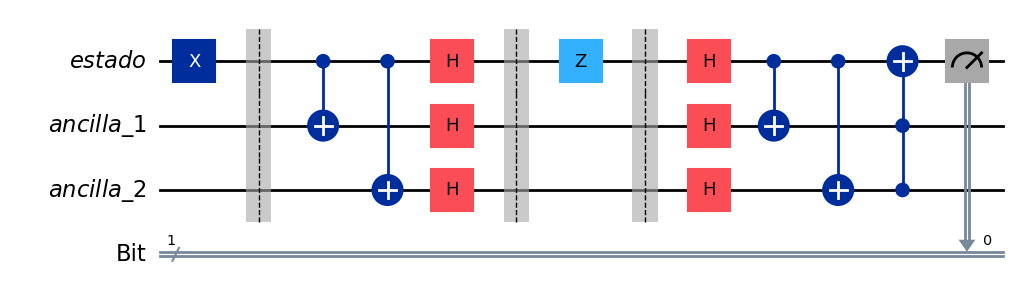

In [26]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

#CREACIÓN DEL CIRCUITO

#Creamos el circuito con nuestros qubits y bits
estado = QuantumRegister(1, "estado")
ancilla1 = QuantumRegister(1, "ancilla_1")
ancilla2 = QuantumRegister(1, "ancilla_2")
bit = ClassicalRegister(1, "Bit")

qc = QuantumCircuit(estado,ancilla1,ancilla2,bit)

#qc = QuantumCircuit(3, 3) # con (1,1) tambien funciona primero qubits segundo bits clasicos

#-------------------------------------------------------------------------------------------------

#1.APLICACIÓN DE PUERTAS

qc.x(0)# comprobación de si funciona también para uno

qc.barrier()

qc.cx(0,1)
qc.cx(0,2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.z(0) # error
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)

qc.cx(0,1)
qc.cx(0,2)
qc.ccx(1,2,0)

#--------------------------------------------------------------------------------------------------
#MEDICIÓN DEL QUBIT

#Medimos el qubit para ver si se ha aplicado bien la corrección.
qc.measure(0,0)

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')

In [28]:
 # TRANSPILACIÓN Y SIMULACIÓN DEL CIRCUITO.

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)

#SIMULACIÓN PARA EL CIRCUITO QC

isa_qc = pm.run(qc)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=100) #shots: cantidad de veces q lanzamos el circuito

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.Bit.get_counts()

SamplerPubResult(data=DataBin(Bit=BitArray(<shape=(), num_shots=100, num_bits=1>)), metadata={'shots': 100, 'circuit_metadata': {}})


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


{'1': 100}

Corrección de ambos errores a la vez. este circuito nos corrige un error de fase, pero hasta 3 errores de bit

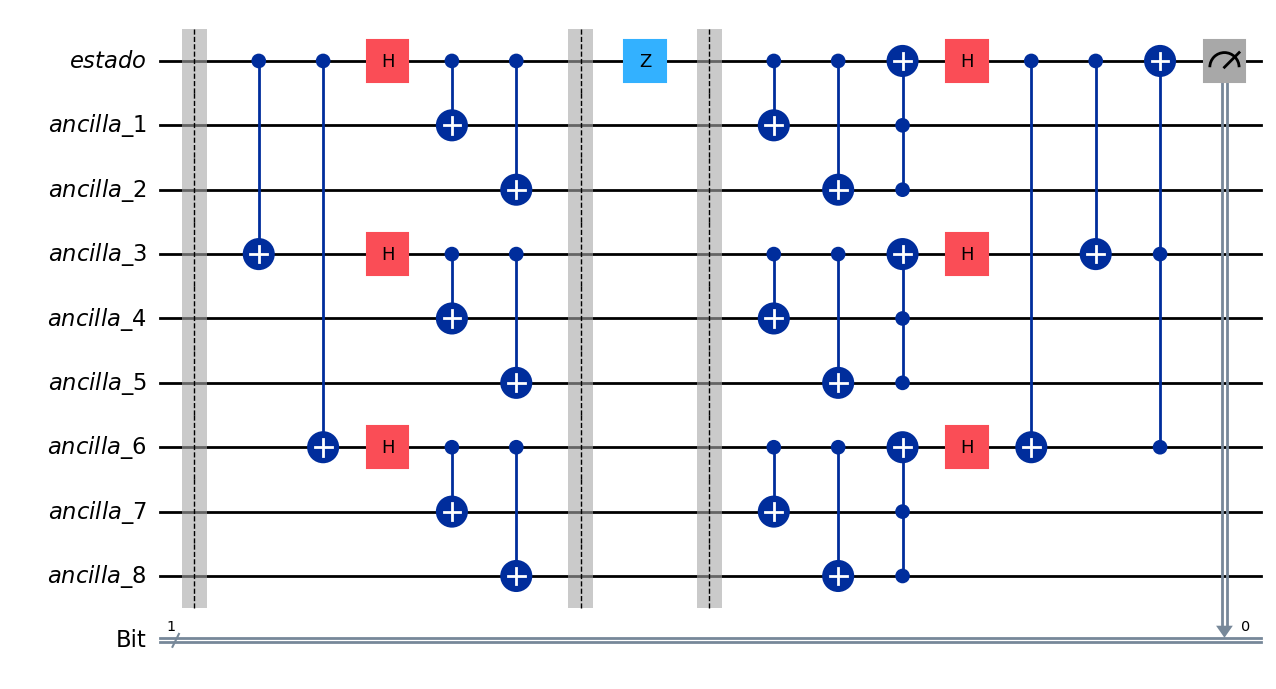

In [38]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

#CREACIÓN DEL CIRCUITO

#Creamos el circuito con nuestros qubits y bits
estado = QuantumRegister(1, "estado")
ancilla1 = QuantumRegister(1, "ancilla_1")
ancilla2 = QuantumRegister(1, "ancilla_2")
ancilla3 = QuantumRegister(1, "ancilla_3")
ancilla4 = QuantumRegister(1, "ancilla_4")
ancilla5 = QuantumRegister(1, "ancilla_5")
ancilla6 = QuantumRegister(1, "ancilla_6")
ancilla7 = QuantumRegister(1, "ancilla_7")
ancilla8 = QuantumRegister(1, "ancilla_8")

bit = ClassicalRegister(1, "Bit")

qc = QuantumCircuit(estado,ancilla1,ancilla2,ancilla3,ancilla4,ancilla5,ancilla6,ancilla7,ancilla8,bit)

#qc = QuantumCircuit(3, 3) # con (1,1) tambien funciona primero qubits segundo bits clasicos

#-------------------------------------------------------------------------------------------------

#1.APLICACIÓN DE PUERTAS

#qc.x(0)# comprobación de si funciona también para uno

qc.barrier()

qc.cx(0,3)
qc.cx(0,6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,1)
qc.cx(0,2)

qc.cx(3,4)
qc.cx(3,5)

qc.cx(6,7)
qc.cx(6,8)

qc.barrier()
qc.z(0) # error
qc.barrier()

qc.cx(0,1)
qc.cx(0,2)
qc.ccx(1,2,0)

qc.cx(3,4)
qc.cx(3,5)
qc.ccx(4,5,3)

qc.cx(6,7)
qc.cx(6,8)
qc.ccx(7,8,6)


qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,6)
qc.cx(0,3)
qc.ccx(3,6,0)




#--------------------------------------------------------------------------------------------------
#MEDICIÓN DEL QUBIT

#Medimos el qubit para ver si se ha aplicado bien la corrección.
qc.measure(0,0)

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')